In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [31]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error")

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1975 samples
Epoch 1/100
1975/1975 [==============================] - 29s 14ms/sample - loss: 0.0089
Epoch 2/100
1975/1975 [==============================] - 13s 7ms/sample - loss: 0.0033
Epoch 3/100
1975/1975 [==============================] - 13s 7ms/sample - loss: 0.0029
Epoch 4/100
1975/1975 [==============================] - 13s 7ms/sample - loss: 0.0024
Epoch 5/100
1975/1975 [==============================] - 13s 7ms/sample - loss: 0.0030
Epoch 6/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0023
Epoch 7/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0025
Epoch 8/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0020
Epoch 9/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0020
Epoch 10/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0018
Epoch 11/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 0.0016
Epoch 12/100
1975/

1975/1975 [==============================] - 16s 8ms/sample - loss: 5.9006e-04
Epoch 92/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 5.8042e-04
Epoch 93/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.6086e-04
Epoch 94/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.1967e-04
Epoch 95/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.6520e-04
Epoch 96/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 5.3475e-04
Epoch 97/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.5265e-04
Epoch 98/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 7.4838e-04
Epoch 99/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.1909e-04
Epoch 100/100
1975/1975 [==============================] - 16s 8ms/sample - loss: 6.4824e-04


In [34]:
dataset_test = pd.read_csv('tatatest.csv')
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
real_stock_price = []
for i in range(60, 76):
    X_test.append(inputs[i - 60 : i, 0])
    real_stock_price.append(training_set_scaled[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = np.array(real_stock_price)
real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0], 1))
real_stock_price = sc.inverse_transform(real_stock_price)

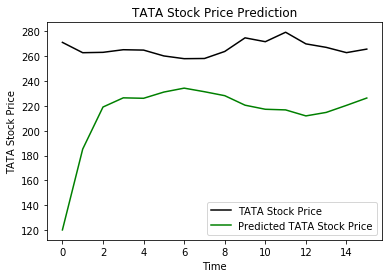

In [35]:
plt.plot(real_stock_price, color = "black", label = "TATA Stock Price")
plt.plot(predicted_stock_price, color = "green", label = "Predicted TATA Stock Price")
plt.title("TATA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TATA Stock Price")
plt.legend()
plt.show()